1. Perform the following statistical analysis on the fifa world cup dataset. The dataset consists of player information which includes height, weight overall rating, potential etc. Data Cleaning and basic EDA process needs to be performed. 
a)	Assuming age as population, perform the central limit theorem with sample size of 200. Find the standard error and the mean of sampling distribution. Compare the results with population mean and standard deviation. Explain in non-technical terms why the estimated standard error of a sample mean tends to decrease with an increase in sample size

b)	Is there any evidence that the players overall rating is greater than 80?

c)	Perform the statistical test to identify whether preferred foot has any impact on potential. Also, perform the graphical analysis.

d)	Perform the statistical test to identify the relation between the overall rating and potential. [Assume both are continuous data points].

e)	Does skill move have any effect in overall rating. Perform the graphical analysis and the statistical analysis.

Note: 
1) Perform all the Statistical analysis with 5%(Significance level). 
2) Perform the test of normality and test of variance in the appropriate places.


2. Perform the following statistical analysis on the mobile network dataset given. The given data set contains information about the internet, calls, messages of various network. Data Cleaning and basic EDA process needs to be performed. 

a) With 95% & 99% Confidence Interval find the range estimate of average duration calls made by all the network. Which of the Intervals are wider? Interpret the results.
b) Perform statistical analysis to check whether the networks are equally distributed in the dataset.
c) Plot the distribution of duration with respect to each network in the same graph and Interpret the results from the graph.
d)	Perform statistical tests to identify the relation between item and duration. Detailed 
explanation of relation between the classes is required.
e)	Perform statistical tests to identify the relation between network and network_type. 


In [5]:
import pandas as pd 
 
import numpy as np


import matplotlib.pyplot as plt

import seaborn as sns

from warnings import filterwarnings
filterwarnings('ignore')


import statsmodels.api as sm

from scipy import stats

import statistics


from scipy.stats import shapiro

from statsmodels.stats import weightstats as stests

In [6]:
df=pd.read_csv('fifa_stats.csv')
df.head()

,Name,Age,Nationality,Overall_rating,Potential,Club,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Jersey Number,Height,Weight
0,L. Messi,31,Argentina,94,94,FC Barcelona,Left,5,4,4,Medium/ Medium,RF,10,5.583333,159
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,Right,5,4,5,High/ Low,ST,7,6.166667,183
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,Right,5,5,5,High/ Medium,LW,10,5.750000,150
3,De Gea,27,Spain,91,93,Manchester United,Right,4,3,1,Medium/ Medium,GK,1,6.333333,168
4,K. De Bruyne,27,Belgium,91,92,Manchester City,Right,4,5,4,High/ High,RCM,7,5.083333,154


In [7]:
df.dtypes

Name                         object
Age                           int64
Nationality                  object
Overall_rating                int64
Potential                     int64
Club                         object
Preferred Foot               object
International Reputation      int64
Weak Foot                     int64
Skill Moves                   int64
Work Rate                    object
Position                     object
Jersey Number                 int64
Height                      float64
Weight                        int64
dtype: object

In [9]:
df.describe()

,Age,Overall_rating,Potential,International Reputation,Weak Foot,Skill Moves,Jersey Number,Height,Weight
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,27.231500,78.197000,80.303500,1.774500,3.204000,2.919500,15.205500,5.781042,169.478000
std,3.859061,3.285969,4.114104,0.811775,0.728457,0.964098,13.210508,0.443337,16.050306
min,17.000000,75.000000,75.000000,1.000000,1.000000,1.000000,1.000000,5.083333,123.000000
25%,24.000000,76.000000,77.000000,1.000000,3.000000,2.000000,7.000000,5.500000,159.000000
50%,27.000000,77.000000,80.000000,2.000000,3.000000,3.000000,12.000000,6.000000,170.000000
75%,30.000000,80.000000,83.000000,2.000000,4.000000,4.000000,20.000000,6.166667,181.000000
max,41.000000,94.000000,95.000000,5.000000,5.000000,5.000000,99.000000,6.583333,227.000000


In [10]:
df.select_dtypes(include='int64')

,Age,Overall_rating,Potential,International Reputation,Weak Foot,Skill Moves,Jersey Number,Weight
0,31,94,94,5,4,4,10,159
1,33,94,94,5,4,5,7,183
2,26,92,93,5,5,5,10,150
3,27,91,93,4,3,1,1,168
4,27,91,92,4,5,4,7,154
...,...,...,...,...,...,...,...,...
1995,22,75,82,1,3,4,19,157
1996,31,75,75,2,3,2,87,187
1997,22,75,82,1,4,4,17,170
1998,32,75,75,2,4,5,14,159


In [11]:
df.shape

(2000, 15)

In [13]:
print('total missing values :',df.isnull().sum())

total missing values : Name                         0
Age                          0
Nationality                  0
Overall_rating               0
Potential                    0
Club                        19
Preferred Foot               0
International Reputation     0
Weak Foot                    0
Skill Moves                  0
Work Rate                    0
Position                     0
Jersey Number                0
Height                       0
Weight                       0
dtype: int64


Only club column has 19 null values

<AxesSubplot:>

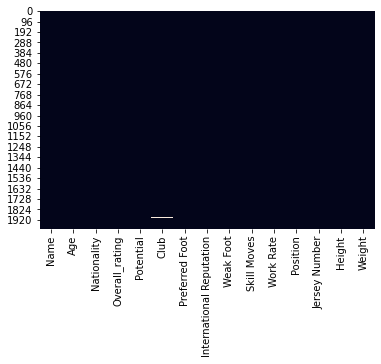

In [17]:
sns.heatmap(df.isnull(),cbar=False)

In [19]:
df['Club'].value_counts()

Chelsea              24
Borussia Dortmund    23
Napoli               23
Manchester United    23
Liverpool            23
                     ..
KasimpaÅŸa SK         1
Rosario Central       1
Willem II             1
Legia Warszawa        1
Club Necaxa           1
Name: Club, Length: 285, dtype: int64

In [20]:
df['Club'].mode()

0    Chelsea
dtype: object

In [27]:
missing_values = df.isnull().sum()

total = df.isnull().sum().sort_values(ascending=False)
percent=((df.isnull().sum()/df.shape[0])*100)
percent = percent.sort_values(ascending=False)


missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

missing_data['Type'] = df[missing_data.index].dtypes


missing_data

,Total,Percent,Type
Club,19,0.95,object
Weight,0,0.00,int64
Height,0,0.00,float64
Jersey Number,0,0.00,int64
Position,0,0.00,object
Work Rate,0,0.00,object
Skill Moves,0,0.00,int64
Weak Foot,0,0.00,int64
International Reputation,0,0.00,int64
Preferred Foot,0,0.00,object


For Club variable we have less than 1 % missing values

<AxesSubplot:>

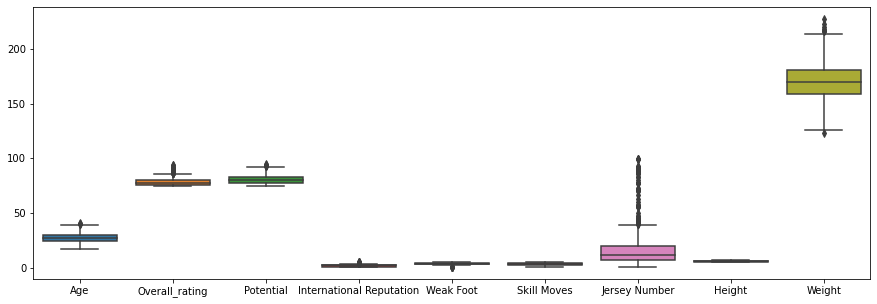

In [26]:
plt.rcParams["figure.figsize"]=[15,5]
sns.boxplot(data=df)

We have Age,Overall rating, Potential, Jersey Number , Weight having outliers

a) Assuming age as population, perform the central limit theorem with sample size of 200. Find the standard error and the mean of sampling distribution. Compare the results with population mean and standard deviation. Explain in non-technical terms why the estimated standard error of a sample mean tends to decrease with an increase in sample size

27.2315 3.8590612753574423


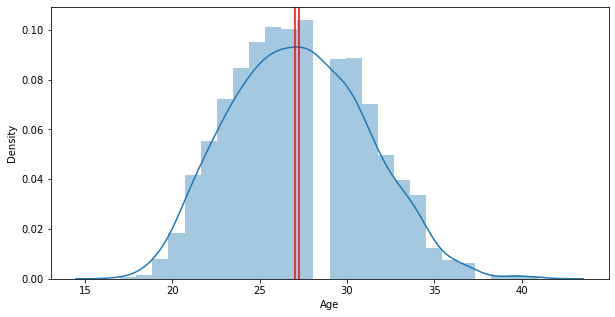

In [38]:
n=200
plt.rcParams["figure.figsize"] = [10,5]
df_mean=df['Age'].mean()
df_std=df['Age'].std()
df_median=df['Age'].median()
print(df_mean,df_std)
sns.distplot(df['Age'])
plt.axvline(df_mean,color='r')
plt.axvline(df_median,color='r')

In [31]:
df_error=df_std/np.sqrt(n)
print(df_error)

0.2728768396819654


In [35]:
sample_size=200
no_of_sample=200
sample_mean_list=[]
for i in range(no_of_sample):
    sample=np.random.choice(df['Age'],size=150,replace=True)
    sample_mean_list.append(np.mean(sample))

print("sample mean ",np.mean(sample_mean_list))
print("sample median ",np.median(sample_mean_list))

sample mean  27.217
sample median  27.213333333333335


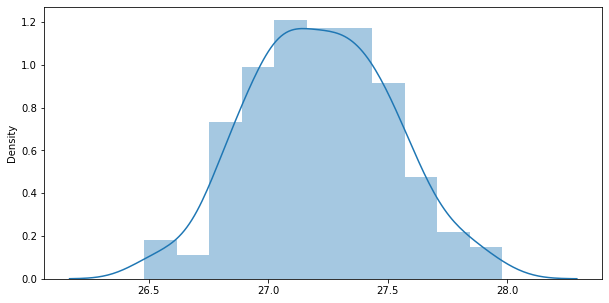

In [39]:
sns.distplot(sample_mean_list)
plt.show()

If we increase the sample size of the population then the standard error appears to be same as mean

# b) Is there any evidence that the players overall rating is greater than 80?

In [41]:
df[df['Overall_rating']>80]

,Name,Age,Nationality,Overall_rating,Potential,Club,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Jersey Number,Height,Weight
0,L. Messi,31,Argentina,94,94,FC Barcelona,Left,5,4,4,Medium/ Medium,RF,10,5.583333,159
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,Right,5,4,5,High/ Low,ST,7,6.166667,183
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,Right,5,5,5,High/ Medium,LW,10,5.750000,150
3,De Gea,27,Spain,91,93,Manchester United,Right,4,3,1,Medium/ Medium,GK,1,6.333333,168
4,K. De Bruyne,27,Belgium,91,92,Manchester City,Right,4,5,4,High/ High,RCM,7,5.083333,154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,Raffael,33,Brazil,81,81,Borussia MÃ¶nchengladbach,Right,2,4,4,High/ Medium,CF,11,5.750000,152
408,Nani,31,Portugal,81,81,Sporting CP,Right,3,5,5,High/ Medium,LM,17,5.083333,150
409,J. Milner,32,England,81,81,Liverpool,Right,2,4,3,High/ High,CM,7,5.750000,154
410,J. Mathieu,34,France,81,81,Sporting CP,Left,3,2,2,High/ Medium,LCB,22,6.166667,185


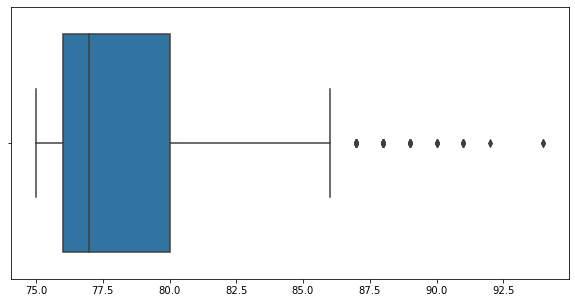

In [53]:

overall_rating=df['Overall_rating'].tolist()

sns.boxplot(overall_rating) 

#there seems to be outliers present in the overall_rating


##outlier treatment or we removed the outliers present in our data

new_overall_rating=[]  #list of overall rating

Q1=np.quantile(overall_rating,0.25)
Q3=np.quantile(overall_rating,0.75)

IQR=Q3-Q1

for i in overall_rating:
    if(i>(Q3 + 1.5 * IQR) or i<(Q1 - 1.5 * IQR)):
        continue
    else:
        new_overall_rating.append(i)



<AxesSubplot:>

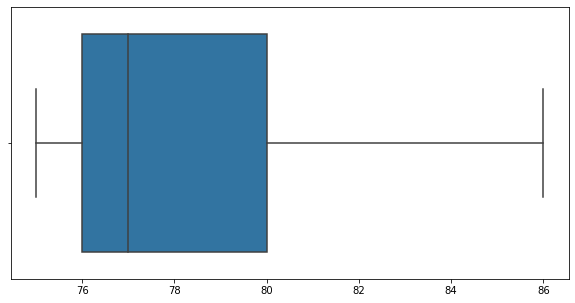

In [54]:
sns.boxplot(new_overall_rating)

In [58]:
shapiro(new_overall_rating)

ShapiroResult(statistic=0.8778463006019592, pvalue=1.3596582414653054e-36)

In [60]:
z_scores_rating = stats.zscore(df["Overall_rating"])

z_scores_rating


array([ 4.81043919,  4.81043919,  4.20163843, ..., -0.97316801,
       -0.97316801, -0.97316801])

In [66]:
df_rating_zscore = df["Overall_rating"][~(( z_scores_rating < -3) |(z_scores_rating> 3))]

In [67]:
df_rating_zscore.shape

(1975,)

In [68]:
shapiro(df_rating_zscore)

ShapiroResult(statistic=0.8693183660507202, pvalue=8.845165744192122e-38)

In [70]:
shapiro(df['Overall_rating'])

ShapiroResult(statistic=0.8525537848472595, pvalue=1.0221183102662362e-39)

# c) Perform the statistical test to identify whether preferred foot has any impact on potential. Also, perform the graphical analysis.

In [ ]:
H0:There is no effect on potential to preffered foot 
H1:There is effect on potential to preffered foot 

In [76]:
table = pd.crosstab(df['Potential'], df['Preferred Foot'])
table

Preferred Foot,Left,Right
Potential,,
75,59,153
76,42,182
77,41,176
78,31,114
79,34,120
80,51,142
81,32,111
82,29,100
83,30,107


In [82]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from scipy.stats import chisquare
test_stat, p, dof, expected_value = chi2_contingency(observed =table, correction = False)

print("Test statistic:", test_stat)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected values:", expected_value)

Test statistic: 29.55053700074528
p-value: 0.07747130218941192
Degrees of freedom: 20
Expected values: [[ 49.396 162.604]
 [ 52.192 171.808]
 [ 50.561 166.439]
 [ 33.785 111.215]
 [ 35.882 118.118]
 [ 44.969 148.031]
 [ 33.319 109.681]
 [ 30.057  98.943]
 [ 31.921 105.079]
 [ 25.63   84.37 ]
 [ 22.368  73.632]
 [ 15.378  50.622]
 [ 12.116  39.884]
 [  9.553  31.447]
 [  7.223  23.777]
 [  4.893  16.107]
 [  2.796   9.204]
 [  2.097   6.903]
 [  0.932   3.068]
 [  0.699   2.301]
 [  0.233   0.767]]


In [ ]:
Since pval > .05 hence There is effect on potential to preffered foot  and we fail to reject null hypothesis

# d) Perform the statistical test to identify the relation between the overall rating and potential. [Assume both are continuous data points].

<AxesSubplot:xlabel='Overall_rating', ylabel='Potential'>

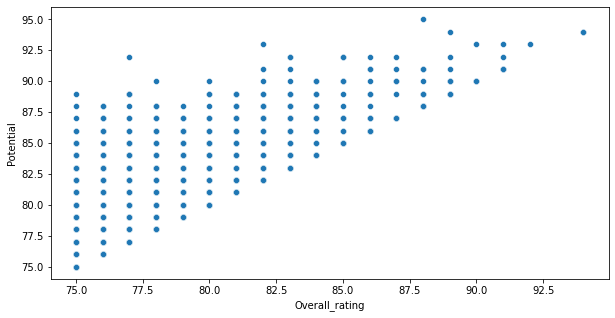

In [84]:
sns.scatterplot(df['Overall_rating'],df['Potential'])

In [88]:
data1=df.Potential
data2=df.Overall_rating

In [90]:
corr,pval=stats.pearsonr(data1,data2)
print(corr,pval)

0.7326945574179985 0.0


In [ ]:
The two variables overall rating and Potential are related as correlation coefficent is greater than .05 and close to 1

# e) Does skill move have any effect in overall rating. Perform the graphical analysis and the statistical analysis.

In [ ]:
H0:There is no effect on skill move to overall rating 
H1:There is effect on skill move to overall rating  

In [94]:
table = pd.crosstab(df['Overall_rating'],df['Skill Moves'])
table

Skill Moves,1,2,3,4,5
Overall_rating,,,,,
75,38,96,219,74,2
76,32,78,171,92,0
77,23,63,138,75,5
78,15,30,64,59,0
79,19,24,72,52,4
80,18,25,56,41,3
81,5,13,28,43,4
82,12,20,24,34,4
83,13,10,17,27,3


In [95]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from scipy.stats import chisquare
test_stat, p, dof, expected_value = chi2_contingency(observed =table, correction = False)

print("Test statistic:", test_stat)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected values:", expected_value)

Test statistic: 264.3544361441865
p-value: 9.004103479489286e-24
Degrees of freedom: 72
Expected values: [[4.16130e+01 8.47275e+01 1.77606e+02 1.16688e+02 8.36550e+00]
 [3.61810e+01 7.36675e+01 1.54422e+02 1.01456e+02 7.27350e+00]
 [2.94880e+01 6.00400e+01 1.25856e+02 8.26880e+01 5.92800e+00]
 [1.62960e+01 3.31800e+01 6.95520e+01 4.56960e+01 3.27600e+00]
 [1.65870e+01 3.37725e+01 7.07940e+01 4.65120e+01 3.33450e+00]
 [1.38710e+01 2.82425e+01 5.92020e+01 3.88960e+01 2.78850e+00]
 [9.02100e+00 1.83675e+01 3.85020e+01 2.52960e+01 1.81350e+00]
 [9.11800e+00 1.85650e+01 3.89160e+01 2.55680e+01 1.83300e+00]
 [6.79000e+00 1.38250e+01 2.89800e+01 1.90400e+01 1.36500e+00]
 [4.36500e+00 8.88750e+00 1.86300e+01 1.22400e+01 8.77500e-01]
 [3.20100e+00 6.51750e+00 1.36620e+01 8.97600e+00 6.43500e-01]
 [2.13400e+00 4.34500e+00 9.10800e+00 5.98400e+00 4.29000e-01]
 [1.26100e+00 2.56750e+00 5.38200e+00 3.53600e+00 2.53500e-01]
 [1.64900e+00 3.35750e+00 7.03800e+00 4.62400e+00 3.31500e-01]
 [1.06700e+00

In [ ]:
Since pval < .05 hence  There is effect on skill move to overall rating  we reject null hypothesis

<AxesSubplot:xlabel='Overall_rating', ylabel='Skill Moves'>

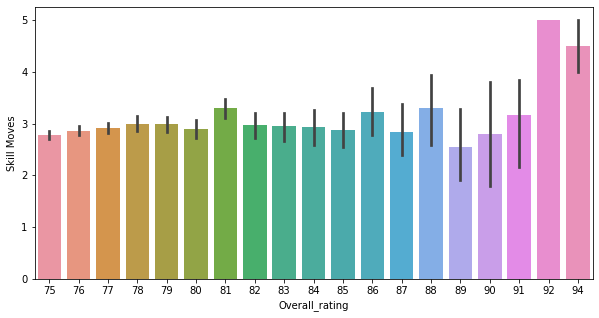

In [97]:
sns.barplot(df['Overall_rating'],df['Skill Moves'])

# Perform the following statistical analysis on the mobile network dataset given. The given data set contains information about the internet, calls, messages of various network. Data Cleaning and basic EDA process needs to be performed.

In [98]:
dfp=pd.read_csv('phone.csv')
dfp.head()

,date,duration,item,month,network,network_type
0,15-10-14 6:58,221.321120,data,2014-11,data,data
1,15-10-14 6:58,81.610599,call,2014-11,Vodafone,mobile
2,15-10-14 14:46,143.109111,call,2014-11,Meteor,mobile
3,15-10-14 14:48,111.888670,call,2014-11,Tesco,mobile
4,15-10-14 17:27,246.695171,call,2014-11,Tesco,mobile


In [99]:
dfp.dtypes

date             object
duration        float64
item             object
month            object
network          object
network_type     object
dtype: object

In [ ]:
date datatype is object so we have to change datatype to datetime

In [105]:
dfp['date'] = pd.to_datetime(dfp['date'])

In [107]:
dfp.dtypes

date            datetime64[ns]
duration               float64
item                    object
month                   object
network                 object
network_type            object
dtype: object

In [106]:
dfp.describe()

,duration
count,820.000000
mean,144.304936
std,45.687777
min,0.993514
25%,112.916486
50%,144.179434
75%,175.932308
max,268.458090


In [101]:
dfp.shape

(820, 6)

In [108]:
dfp.isnull().sum()

date            0
duration        0
item            0
month           0
network         0
network_type    0
dtype: int64

<AxesSubplot:>

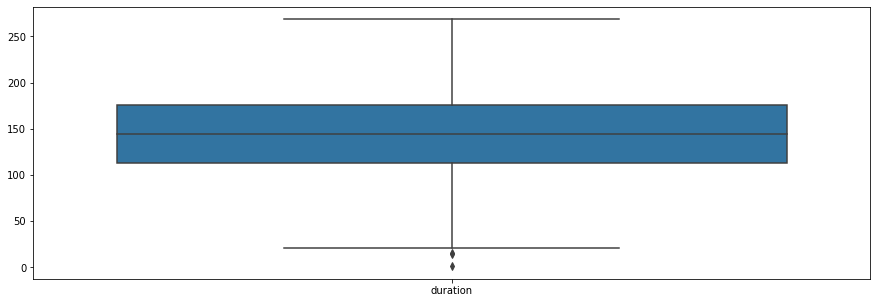

In [110]:
#to check outlier
plt.rcParams["figure.figsize"]=[15,5]
sns.boxplot(data=dfp)

<AxesSubplot:xlabel='duration', ylabel='Density'>

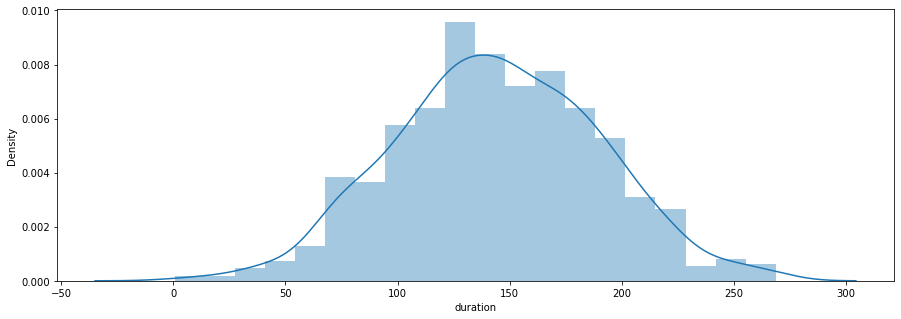

In [112]:
sns.distplot(dfp['duration'])

In [115]:
dfp.skew()

duration    0.005764
dtype: float64

In [ ]:
Data is right tailed as it is slightly skewed towards right

In [114]:
shapiro(dfp['duration'])

ShapiroResult(statistic=0.9984679818153381, pvalue=0.701244592666626)

In [ ]:
Since pval is greater than .05 hence data of duration column is normal

# a) With 95% & 99% Confidence Interval find the range estimate of average duration calls made by all the network. Which of the Intervals are wider? Interpret the results.

In [116]:
xbar=dfp['duration'].mean()
xbar

144.30493555983546

In [118]:
shapiro(dfp['duration'])

ShapiroResult(statistic=0.9984679818153381, pvalue=0.701244592666626)

In [ ]:
pval is greater than alpha hence data is normal

In [124]:
n=len(dfp['duration'])
std=dfp['duration'].std()
print(std)

45.68777682571285


In [125]:
stats.norm.interval(.95,loc=xbar,scale=std/np.sqrt(n))

(141.1778397288302, 147.4320313908407)

In [126]:
stats.norm.interval(.99,loc=xbar,scale=std/np.sqrt(n))

(140.19523500408818, 148.41463611558274)

In [ ]:
For 99% confidence interval it is wider hence as range increases as the interval increases

# b) Perform statistical analysis to check whether the networks are equally distributed in the dataset.

In [128]:
dfp['network'].unique()

array(['data', 'Vodafone', 'Meteor', 'Tesco', 'Three', 'voicemail',
       'landline'], dtype=object)

In [130]:
observed_value = dfp['network'].value_counts()

observed_value

Three        215
Vodafone     215
data         150
Meteor        87
Tesco         84
landline      42
voicemail     27
Name: network, dtype: int64

In [136]:
exp_count=[.1428,.1428,.1428,.1428,.1428,.1428,.1428]
observed_value.sum()

820

In [137]:
expected_value = np.array(exp_count)*820

In [132]:
#H0: no significant difference and equal distributed
#H1: significant difference and not equal distributed

In [138]:
stat, p_value = chisquare(f_obs = observed_value, f_exp = expected_value)

print('Test statistic:', stat)
print('p-value:', p_value)

Test statistic: 307.53290045774406
p-value: 1.9880208837937812e-63


In [ ]:
pval is less than .05 hence we reject null hypothesis and hence network is significant difference and not equal distributed

# c) Plot the distribution of duration with respect to each network in the same graph and Interpret the results from the graph

<AxesSubplot:xlabel='network', ylabel='duration'>

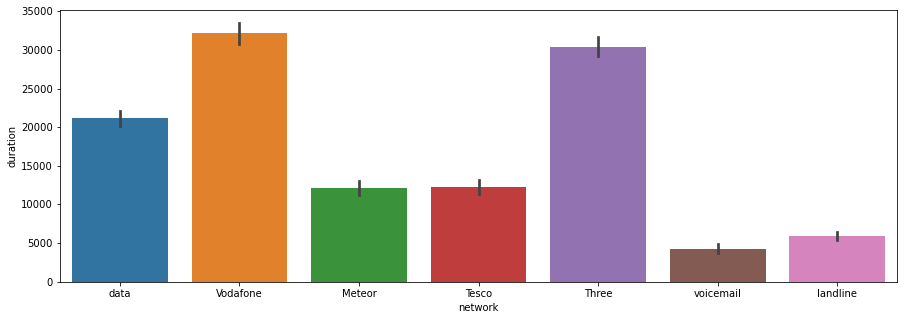

In [139]:
sns.barplot(dfp['network'],dfp['duration'],estimator=sum)

<AxesSubplot:xlabel='network', ylabel='duration'>

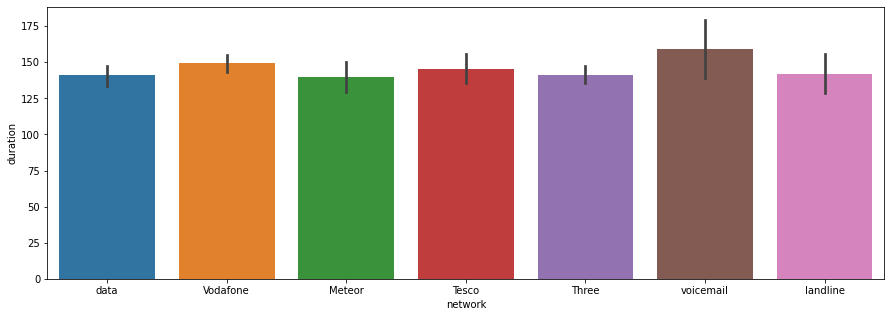

In [140]:
sns.barplot(dfp['network'],dfp['duration'],estimator=np.mean)

<AxesSubplot:xlabel='network', ylabel='duration'>

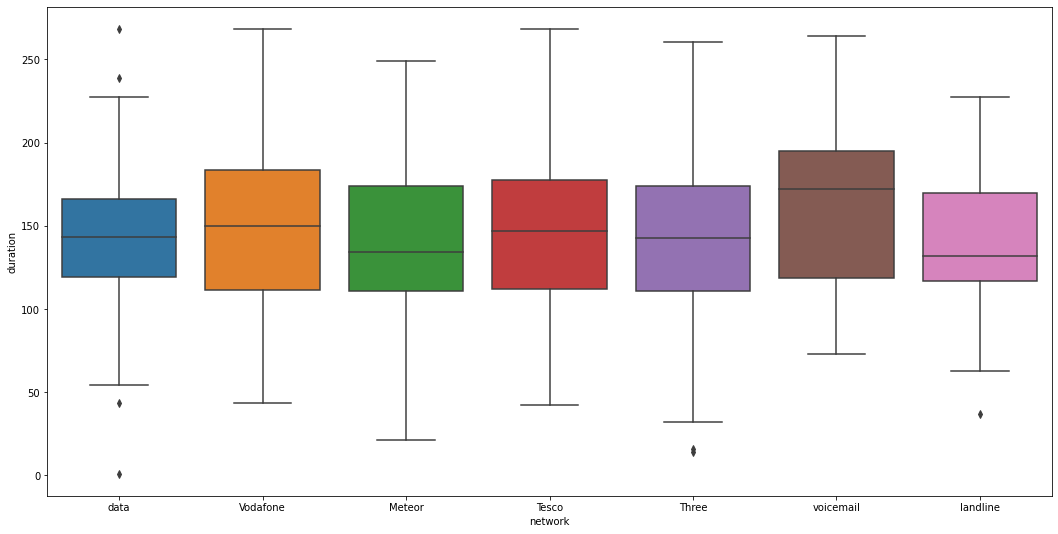

In [141]:
plt.figure(figsize=(18,9))
sns.boxplot(dfp['network'],dfp['duration'])

conclusions

1.average of duration is maximum for voicemail and its overall sum of duration is least among all networks
2.total duration is maximum for vodafone
3.there is possibilty of outliers in distribution of duration in following networks:-data,three,landline


# d) Perform statistical tests to identify the relation between item and duration. Detailed explanation of relation between the classes is required.

In [143]:
# H0: μ1 = μ2 = μ3
# HA: At least one μ differs
    
import statsmodels.api         as     sm
from   statsmodels.formula.api import ols
 
alpha=0.05
mod = ols('duration ~ item', data = dfp).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                sum_sq     df         F    PR(>F)
item      8.044792e+03    2.0  1.931396  0.145607
Residual  1.701514e+06  817.0       NaN       NaN


pvalue>alpha so fail to reject null hypothesis
so there is no change or variance in duration for each item type

In [146]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
print(pairwise_tukeyhsd(dfp['duration'], dfp['item']))

#since all are false in reject so there is no difference in mean for all categories

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
  call   data  -6.6347 0.2862 -16.9372  3.6678  False
  call    sms  -6.0621  0.207 -14.4472   2.323  False
  data    sms   0.5726    0.9 -10.2563 11.4015  False
-----------------------------------------------------


since all are false in reject so there is no difference in mean for all categories


# e) Perform statistical tests to identify the relation between network and network_type

In [148]:
df_contigency=pd.crosstab(dfp['network_type'],dfp['network'])
df_contigency

network,Meteor,Tesco,Three,Vodafone,data,landline,voicemail
network_type,,,,,,,
data,0,0,0,0,150,0,0
landline,0,0,0,0,0,42,0
mobile,87,84,215,215,0,0,0
voicemail,0,0,0,0,0,0,27


H0: There is no relationship between  network  and network_type

HA: There is relationship between  network  and network_type


In [150]:
alpha=0.05

chi_sq_Stat, p_value, deg_freedom, exp_freq = stats.chi2_contingency(df_contigency)

print('Chi-square statistic %3.5f P value %1.6f Degrees of freedom %d' %(chi_sq_Stat, p_value,deg_freedom))

Chi-square statistic 2460.00000 P value 0.000000 Degrees of freedom 18


In [ ]:

pvalue<alpha

we will reject null hypothesis 

i.e. there is a relationship between network and network_type

